TABLE OF CONTENT.
1. IMPORTING NECESSARY LIBRATIES AND MODULES
2. READING OF THE DATASET
3. BASIS DATA ANALYSIS AND DATA TRANSFORMATION
4. VISUALIZATION

# 1. IMPORTING NECESSARY LIBRARIES AND MODULES

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 2. READING OF THE DATASET (CSV FORMAT)

In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
# Reading first N observation
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


# 3. Basic Data Analysis & DATA TRANSFORMATION

In [4]:
# Dataset Information -- Number of Columns, Datatypes, etc.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
# Name of Columns
df.columns.to_list()

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [6]:
#checking for missing values in dataset. 
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
#checking statistical characteristics for numerical features (without preprocessing)
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


## 3.1 TRANSFORMATION. 

In [8]:
df['remote_ratio'] = df['remote_ratio'].replace({
    0: 'On site',
    50: 'Half remote',
    100: 'full remote',
})

In [9]:
df['remote_ratio'] = df['remote_ratio'].replace({
    'On site': 0,
    'Half remote': 50,
    'full remote': 100,
})

In [10]:
encoder = OneHotEncoder()
toEncode_workYear = df.copy()
feature_to_encode="work_year"
df = pd.get_dummies(toEncode_workYear, columns=[feature_to_encode], prefix=[feature_to_encode])

In [11]:
toEncode_workYear = df.copy()
feature_to_encode="remote_ratio"
df = pd.get_dummies(toEncode_workYear, columns=[feature_to_encode], prefix=[feature_to_encode])

In [12]:
df["work_year_2020"]= df["work_year_2020"].astype('int64')
df["work_year_2021"]= df["work_year_2021"].astype('int64')
df["work_year_2022"]= df["work_year_2022"].astype('int64')
df["work_year_2023"]= df["work_year_2023"].astype('int64')
df["remote_ratio_0"]= df["remote_ratio_0"].astype('int64')
df["remote_ratio_50"]= df["remote_ratio_50"].astype('int64')
df["remote_ratio_100"]= df["remote_ratio_100"].astype('int64')

In [13]:
df['experience_level'] = df['experience_level'].replace({
    'SE': 'Senior level',
    'EN': 'Entry level',
    'EX': 'Excecutive level',
    'MI': 'Mid/Intermediete level',
})

df['company_size'] = df['company_size'].replace({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large',
})

In [14]:
toEncode_workYear = df.copy()
feature_to_encode="experience_level"
df = pd.get_dummies(toEncode_workYear, columns=[feature_to_encode], prefix=[feature_to_encode])

In [15]:
df["experience_level_Entry level"]= df["experience_level_Entry level"].astype('int64')
df["experience_level_Excecutive level"]= df["experience_level_Excecutive level"].astype('int64')
df["experience_level_Mid/Intermediete level"]= df["experience_level_Mid/Intermediete level"].astype('int64')
df["experience_level_Senior level"]= df["experience_level_Senior level"].astype('int64')

In [16]:
df['company_size'] = df['company_size'].replace({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large',
})

In [17]:
toEncode_workYear = df.copy()
feature_to_encode="company_size"
df = pd.get_dummies(toEncode_workYear, columns=[feature_to_encode], prefix=[feature_to_encode])

In [18]:
df["company_size_Large"]= df["company_size_Large"].astype('int64')
df["company_size_Medium"]= df["company_size_Medium"].astype('int64')
df["company_size_Small"]= df["company_size_Small"].astype('int64')

In [19]:
df['employment_type'] = df['employment_type'].replace('FT', 'Full-Time')
df['employment_type'] = df['employment_type'].replace('CT', 'Contractor')
df['employment_type'] = df['employment_type'].replace('FL', 'Freelancer')
df['employment_type'] = df['employment_type'].replace('PT', 'Part-Time')

In [20]:
toEncode_workYear = df.copy()
feature_to_encode="employment_type"
df = pd.get_dummies(toEncode_workYear, columns=[feature_to_encode], prefix=[feature_to_encode])

In [21]:
df["employment_type_Full-Time"]= df["employment_type_Full-Time"].astype('int64')
df["employment_type_Part-Time"]= df["employment_type_Part-Time"].astype('int64')
df["employment_type_Contractor"]= df["employment_type_Contractor"].astype('int64')
df["employment_type_Freelancer"]= df["employment_type_Freelancer"].astype('int64')


In [22]:
country_mapping = {
    'US': 'North America',
    'GB': 'Europe',
    'CA': 'North America',
    'ES': 'Europe',
    'IN': 'Asia',
    'DE': 'Europe',
    'FR': 'Europe',
    'PT': 'Europe',
    'BR': 'South America',
    'GR': 'Europe',
    'NL': 'Europe',
    'AU': 'Oceania',
    'MX': 'North America',
    'IT': 'Europe',
    'PK': 'Asia',
    'JP': 'Asia',
    'IE': 'Europe',
    'NG': 'Africa',
    'AT': 'Europe',
    'AR': 'South America',
    'PL': 'Europe',
    'PR': 'North America',
    'TR': 'Asia',
    'BE': 'Europe',
    'SG': 'Asia',
    'RU': 'Europe',
    'LV': 'Europe',
    'UA': 'Europe',
    'CO': 'South America',
    'CH': 'Europe',
    'SI': 'Europe',
    'BO': 'South America',
    'DK': 'Europe',
    'HR': 'Europe',
    'HU': 'Europe',
    'RO': 'Europe',
    'TH': 'Asia',
    'AE': 'Asia',
    'VN': 'Asia',
    'HK': 'Asia',
    'UZ': 'Asia',
    'PH': 'Asia',
    'CF': 'Africa',
    'CL': 'South America',
    'FI': 'Europe',
    'CZ': 'Europe',
    'SE': 'Europe',
    'AS': 'Oceania',
    'LT': 'Europe',
    'GH': 'Africa',
    'KE': 'Africa',
    'DZ': 'Africa',
    'NZ': 'Oceania',
    'JE': 'Europe',
    'MY': 'Asia',
    'MD': 'Europe',
    'IQ': 'Asia',
    'BG': 'Europe',
    'LU': 'Europe',
    'RS': 'Europe',
    'HN': 'North America',
    'EE': 'Europe',
    'TN': 'Africa',
    'CR': 'North America',
    'ID': 'Asia',
    'EG': 'Africa',
    'DO': 'North America',
    'CN': 'Asia',
    'SK': 'Europe',
    'IR': 'Asia',
    'MA': 'Africa',
    'IL': 'Asia',
    'MK': 'Europe',
    'BA': 'Europe',
    'AM': 'Asia',
    'CY': 'Asia',
    'KW': 'Asia',
    'MT': 'Europe',
    'AL': 'Europe',
    'BS': 'North America'
}

country_codes = ['US', 'GB', 'CA', 'ES', 'IN', 'DE', 'FR', 'PT', 'BR', 'GR', 'NL', 'AU',
                'MX', 'IT', 'PK', 'JP', 'IE', 'NG', 'AT', 'AR', 'PL', 'PR', 'TR', 'BE',
                'SG', 'RU', 'LV', 'UA', 'CO', 'CH', 'SI', 'BO', 'DK', 'HR', 'HU', 'RO',
                'TH', 'AE', 'VN', 'HK', 'UZ', 'PH', 'CF', 'CL', 'FI', 'CZ', 'SE', 'AS',
                'LT', 'GH', 'KE', 'DZ', 'NZ', 'JE', 'MY', 'MD', 'IQ', 'BG', 'LU', 'RS',
                'HN', 'EE', 'TN', 'CR', 'ID', 'EG', 'DO', 'CN', 'SK', 'IR', 'MA', 'IL',
                'MK', 'BA', 'AM', 'CY', 'KW', 'MT', 'AL', 'BS']

continent_mapping = {country: country_mapping.get(country, 'Unknown') for country in country_codes}

In [23]:
for i in range(len(df)):
    df['employee_residence'][i] = continent_mapping[df['employee_residence'][i]]
for i in range(len(df)):
    df['company_location'][i] = continent_mapping[df['company_location'][i]]

C:\Users\Purvam Sheth\AppData\Local\Temp\ipykernel_23412\1631718265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['employee_residence'][i] = continent_mapping[df['employee_residence'][i]]
C:\Users\Purvam Sheth\AppData\Local\Temp\ipykernel_23412\1631718265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_location'][i] = continent_mapping[df['company_location'][i]]


In [24]:
for i in range (len(df)):
    if df['job_title'][i].split()[0] != "Head":
        df['job_title'][i] = df['job_title'][i].split()[-1]
    elif df['job_title'][i].split()[0] == "Head":
        df['job_title'][i] = "Head"

C:\Users\Purvam Sheth\AppData\Local\Temp\ipykernel_23412\2650894320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_title'][i] = df['job_title'][i].split()[-1]
C:\Users\Purvam Sheth\AppData\Local\Temp\ipykernel_23412\2650894320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_title'][i] = "Head"


# 4 Visualization

<AxesSubplot: xlabel='salary_in_usd', ylabel='Density'>

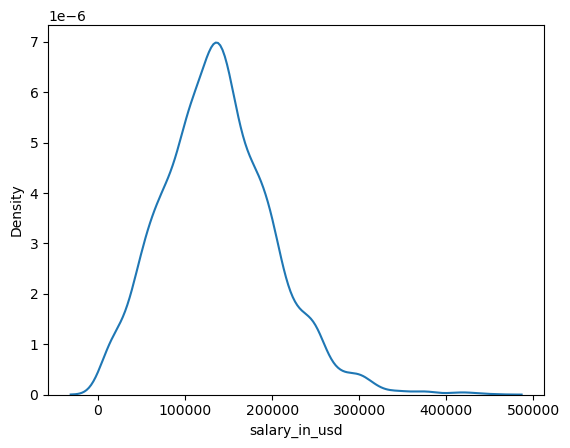

In [25]:
#Distribution
sns.kdeplot(df["salary_in_usd"])

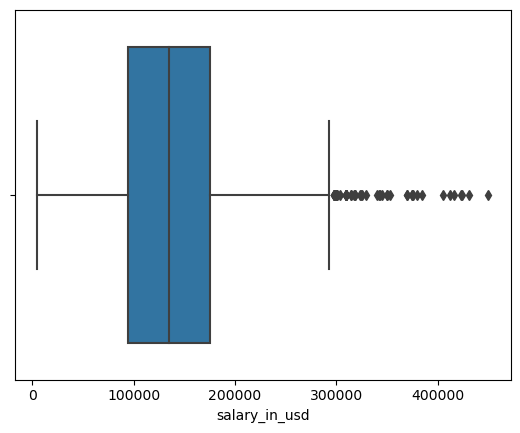

In [26]:
#Outliers
sns.boxplot(x="salary_in_usd", data=df);

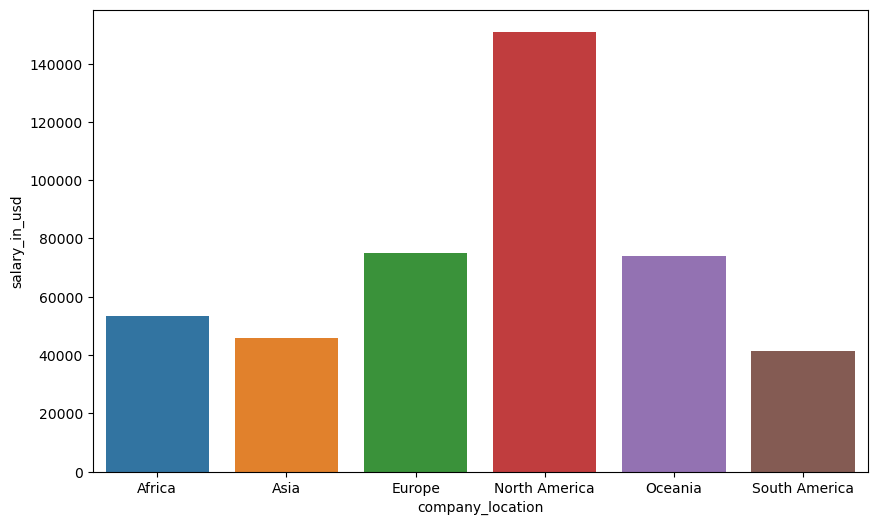

In [27]:
average_salaries  = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

plt.figure(figsize = (10,6))
p = sns.barplot(x = "company_location" , y  = "salary_in_usd", data=average_salaries)

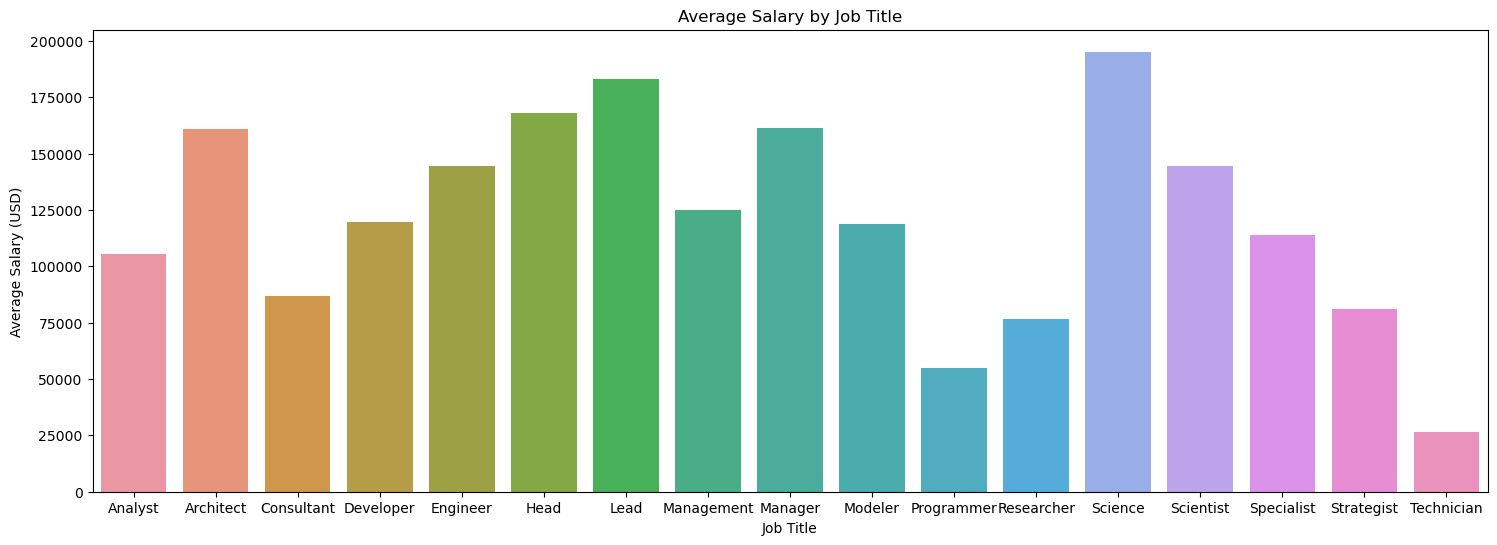

In [28]:
average_salaries = df.groupby('job_title')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(18, 6))
sns.barplot(x="job_title", y="salary_in_usd", data=average_salaries)
plt.ylabel("Average Salary (USD)")
plt.xlabel("Job Title")
plt.title("Average Salary by Job Title")
plt.show()


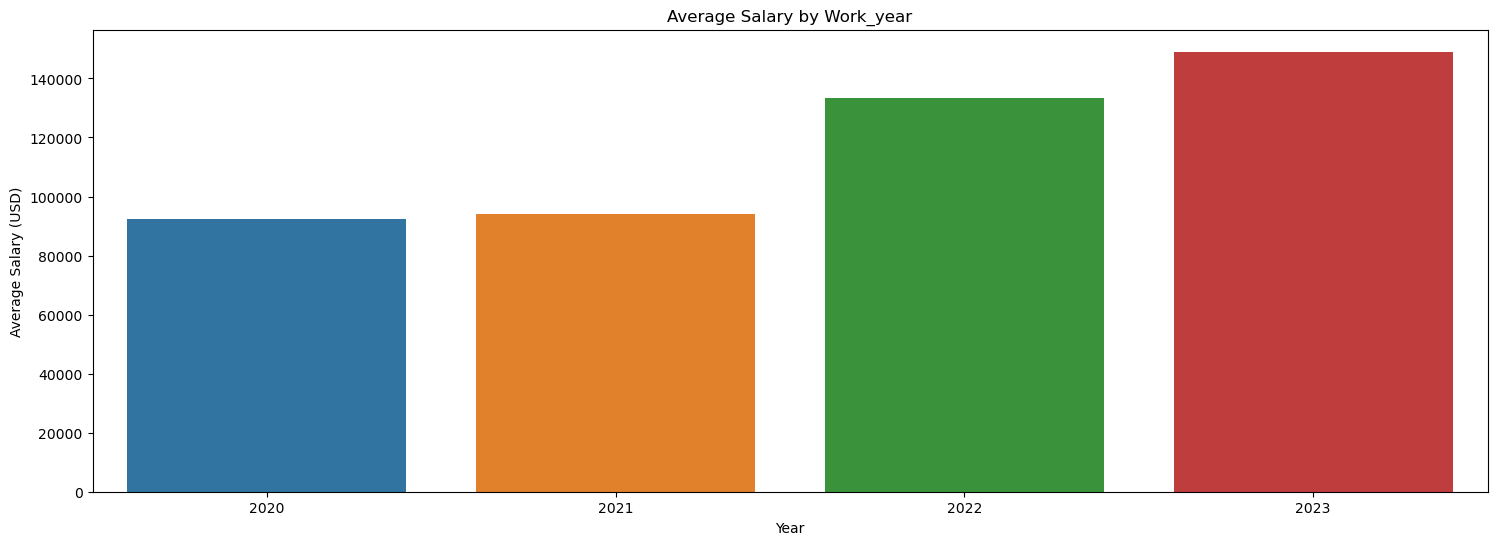

In [29]:
average_salary_2020 = df[df['work_year_2020'] == 1]['salary_in_usd'].mean()
average_salary_2021 = df[df['work_year_2021'] == 1]['salary_in_usd'].mean()
average_salary_2022 = df[df['work_year_2022'] == 1]['salary_in_usd'].mean()
average_salary_2023 = df[df['work_year_2023'] == 1]['salary_in_usd'].mean()

average_salaries=[average_salary_2020,average_salary_2021,average_salary_2022,average_salary_2023]
work_year = ["2020","2021","2022","2023"]
plt.figure(figsize=(18, 6)) 
sns.barplot(x=work_year, y=average_salaries)
plt.ylabel("Average Salary (USD)")
plt.xlabel("Year")
plt.title("Average Salary by Work_year")
plt.show()

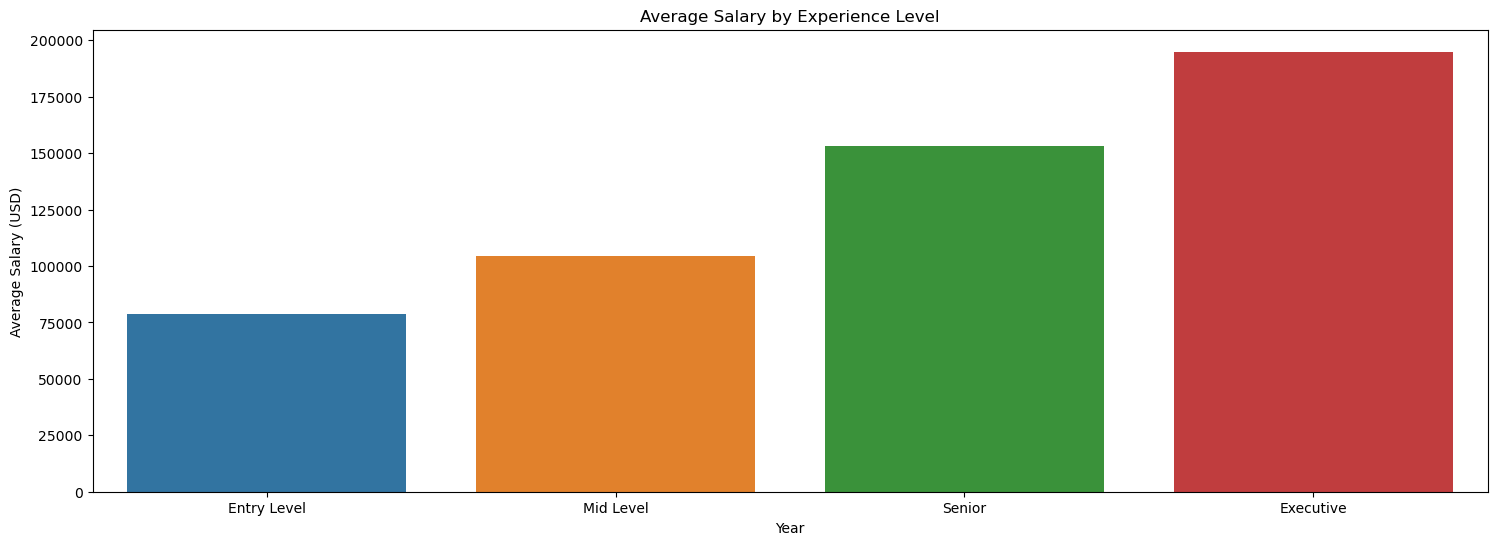

In [30]:
average_salary_exc = df[df['experience_level_Excecutive level'] == 1]['salary_in_usd'].mean()
average_salary_int = df[df['experience_level_Mid/Intermediete level'] == 1]['salary_in_usd'].mean()
average_salary_sen = df[df['experience_level_Senior level'] == 1]['salary_in_usd'].mean()
average_salary_ent = df[df['experience_level_Entry level'] == 1]['salary_in_usd'].mean()

average_salaries=[average_salary_ent, average_salary_int, average_salary_sen, average_salary_exc]

ExpLevel = ["Entry Level","Mid Level","Senior","Executive"]
plt.figure(figsize=(18, 6)) 
sns.barplot(x=ExpLevel, y=average_salaries)
plt.ylabel("Average Salary (USD)")
plt.xlabel("Year")
plt.title("Average Salary by Experience Level")
plt.show()

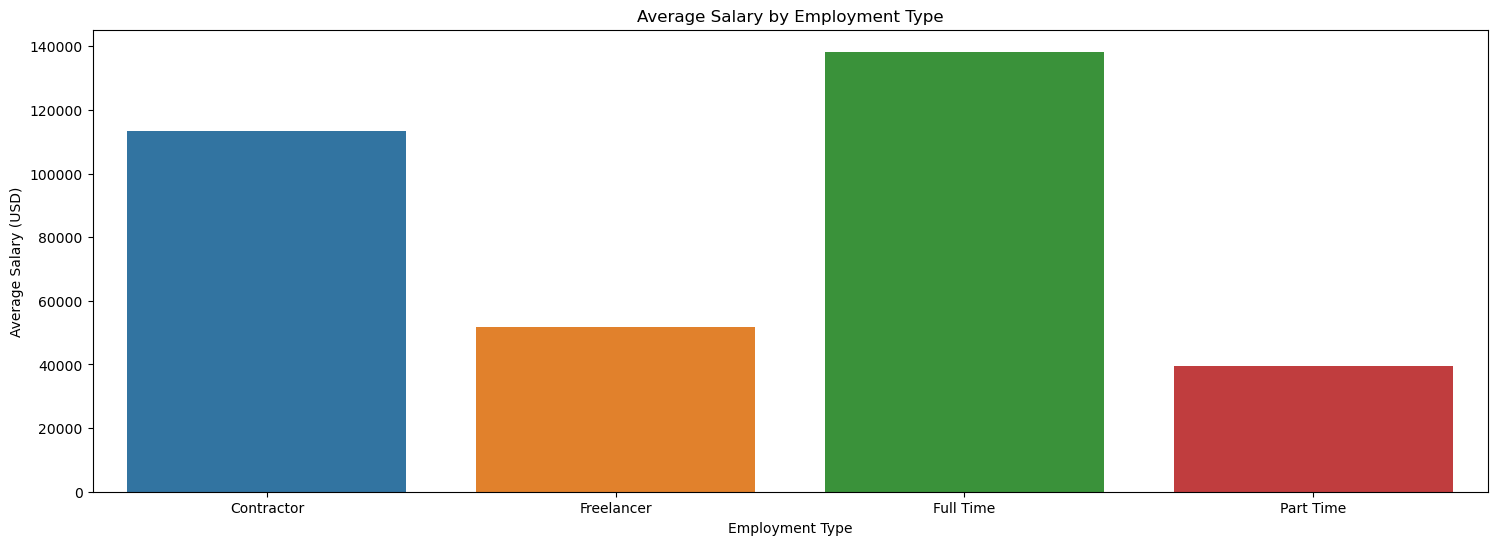

In [31]:
average_salary_cont = df[df['employment_type_Contractor'] == 1]['salary_in_usd'].mean()
average_salary_free = df[df['employment_type_Freelancer'] == 1]['salary_in_usd'].mean()
average_salary_full = df[df['employment_type_Full-Time'] == 1]['salary_in_usd'].mean()
average_salary_part = df[df['employment_type_Part-Time'] == 1]['salary_in_usd'].mean()

average_salaries=[average_salary_cont, average_salary_free, average_salary_full, average_salary_part]

EmpType = ["Contractor","Freelancer","Full Time","Part Time"]
plt.figure(figsize=(18, 6)) 
sns.barplot(x=EmpType, y=average_salaries)
plt.ylabel("Average Salary (USD)")
plt.xlabel("Employment Type")
plt.title("Average Salary by Employment Type")
plt.show()

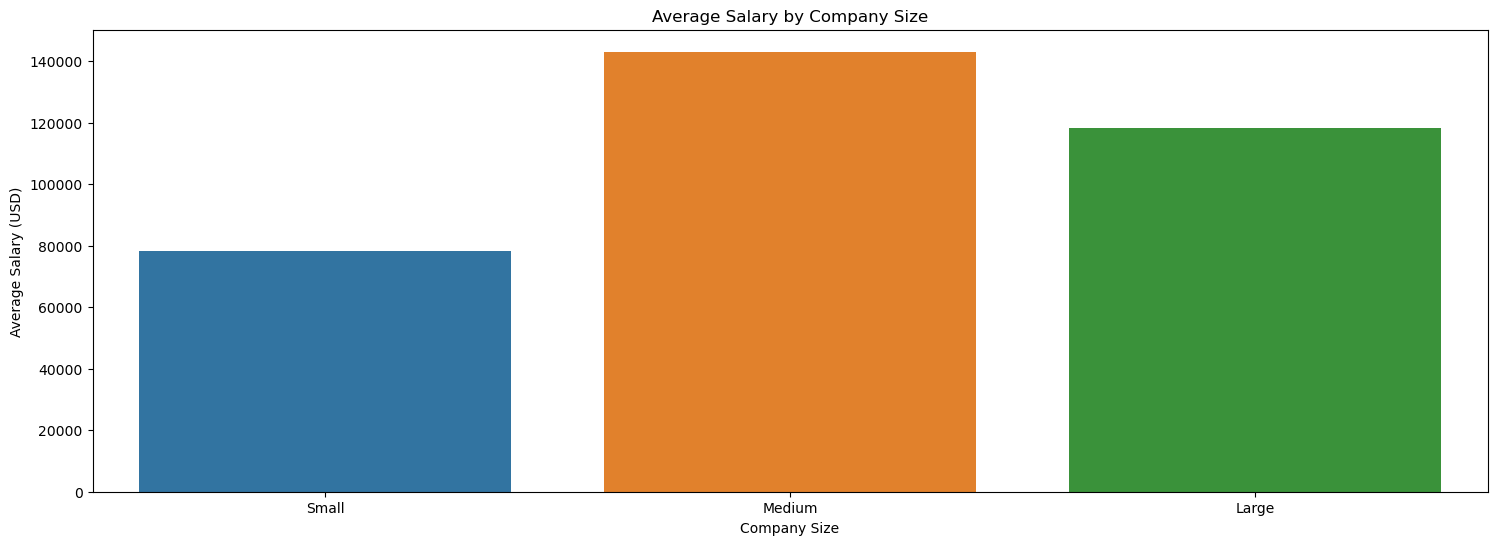

In [32]:
average_salary_sc = df[df['company_size_Small'] == 1]['salary_in_usd'].mean()
average_salary_mc = df[df['company_size_Medium'] == 1]['salary_in_usd'].mean()
average_salary_lc = df[df['company_size_Large'] == 1]['salary_in_usd'].mean()

average_salaries=[average_salary_sc, average_salary_mc, average_salary_lc]

Csize = ["Small","Medium","Large"]
plt.figure(figsize=(18, 6)) 
sns.barplot(x=Csize, y=average_salaries)
plt.ylabel("Average Salary (USD)")
plt.xlabel("Company Size")
plt.title("Average Salary by Company Size")
plt.show()

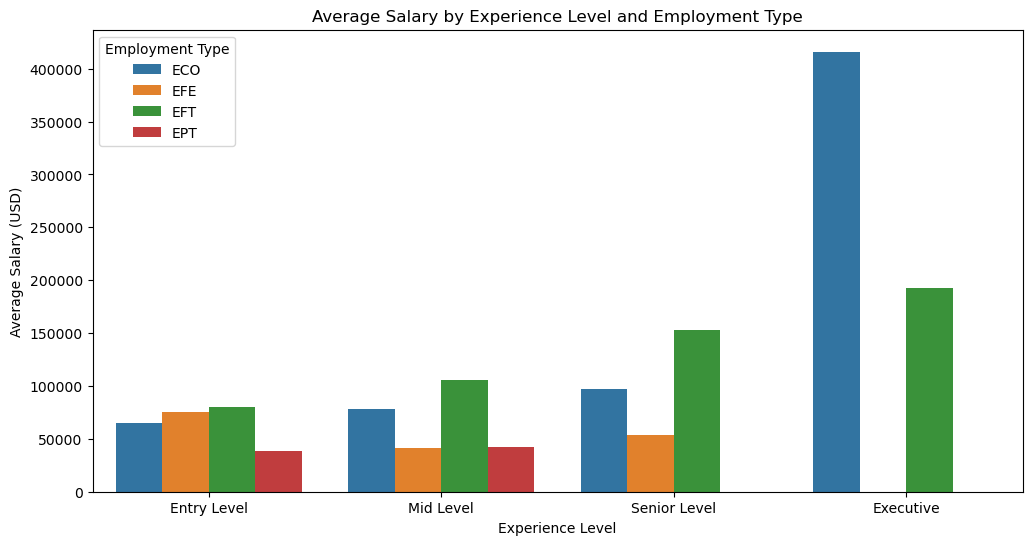

In [33]:
average_salaries_ECO = df[(df['experience_level_Entry level'] == 1) & (df['employment_type_Contractor'] == 1)]['salary_in_usd'].mean()
average_salaries_EFE = df[(df['experience_level_Entry level'] == 1) & (df['employment_type_Freelancer'] == 1)]['salary_in_usd'].mean()
average_salaries_EFT = df[(df['experience_level_Entry level'] == 1) & (df['employment_type_Full-Time'] == 1)]['salary_in_usd'].mean()
average_salaries_EPT = df[(df['experience_level_Entry level'] == 1) & (df['employment_type_Part-Time'] == 1)]['salary_in_usd'].mean()
average_salaries_EL = [average_salaries_ECO,average_salaries_EFE,average_salaries_EFT,average_salaries_EPT]

average_salaries_MCO = df[(df['experience_level_Mid/Intermediete level'] == 1) & (df['employment_type_Contractor'] == 1)]['salary_in_usd'].mean()
average_salaries_MFE = df[(df['experience_level_Mid/Intermediete level'] == 1) & (df['employment_type_Freelancer'] == 1)]['salary_in_usd'].mean()
average_salaries_MFT = df[(df['experience_level_Mid/Intermediete level'] == 1) & (df['employment_type_Full-Time'] == 1)]['salary_in_usd'].mean()
average_salaries_MPT = df[(df['experience_level_Mid/Intermediete level'] == 1) & (df['employment_type_Part-Time'] == 1)]['salary_in_usd'].mean()
average_salaries_ML = [average_salaries_MCO,average_salaries_MFE,average_salaries_MFT,average_salaries_MPT]

average_salaries_SCO = df[(df['experience_level_Senior level'] == 1) & (df['employment_type_Contractor'] == 1)]['salary_in_usd'].mean()
average_salaries_SFE = df[(df['experience_level_Senior level'] == 1) & (df['employment_type_Freelancer'] == 1)]['salary_in_usd'].mean()
average_salaries_SFT = df[(df['experience_level_Senior level'] == 1) & (df['employment_type_Full-Time'] == 1)]['salary_in_usd'].mean()
average_salaries_SPT = df[(df['experience_level_Senior level'] == 1) & (df['employment_type_Part-Time'] == 1)]['salary_in_usd'].mean()
average_salaries_SL = [average_salaries_SCO,average_salaries_SFE,average_salaries_SFT,average_salaries_SPT]

average_salaries_EECO = df[(df['experience_level_Excecutive level'] == 1) & (df['employment_type_Contractor'] == 1)]['salary_in_usd'].mean()
average_salaries_EEFE = df[(df['experience_level_Excecutive level'] == 1) & (df['employment_type_Freelancer'] == 1)]['salary_in_usd'].mean()
average_salaries_EEFT = df[(df['experience_level_Excecutive level'] == 1) & (df['employment_type_Full-Time'] == 1)]['salary_in_usd'].mean()
average_salaries_EEPT = df[(df['experience_level_Excecutive level'] == 1) & (df['employment_type_Part-Time'] == 1)]['salary_in_usd'].mean()
average_salaries_EEPT = [average_salaries_EECO,average_salaries_EEFE,average_salaries_EEFT,average_salaries_EEPT]


ExperienceLevel = ["Entry Level","Mid Level","Senior Level","Exceutive"]
employment_types = ["ECO", "EFE", "EFT", "EPT"]



experience_levels = ["Entry Level", "Mid Level", "Senior Level", "Executive"]
employment_types = ["ECO", "EFE", "EFT", "EPT"]
average_salaries = [
    average_salaries_EL,  # Entry Level
    average_salaries_ML,  # Mid Level
    average_salaries_SL,  # Senior Level
    average_salaries_EEPT   # Executive
]

data = pd.DataFrame({
    'Experience Level': [level for level in experience_levels for _ in employment_types],
    'Employment Type': employment_types * len(experience_levels),
    'Average Salary': [avg for sublist in average_salaries for avg in sublist]
})

plt.figure(figsize=(12, 6))

sns.barplot(x='Experience Level', y='Average Salary', hue='Employment Type', data=data)

plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Experience Level and Employment Type")

# Show the plot
plt.show()


C:\Users\Purvam Sheth\AppData\Local\Temp\ipykernel_23412\3696401049.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

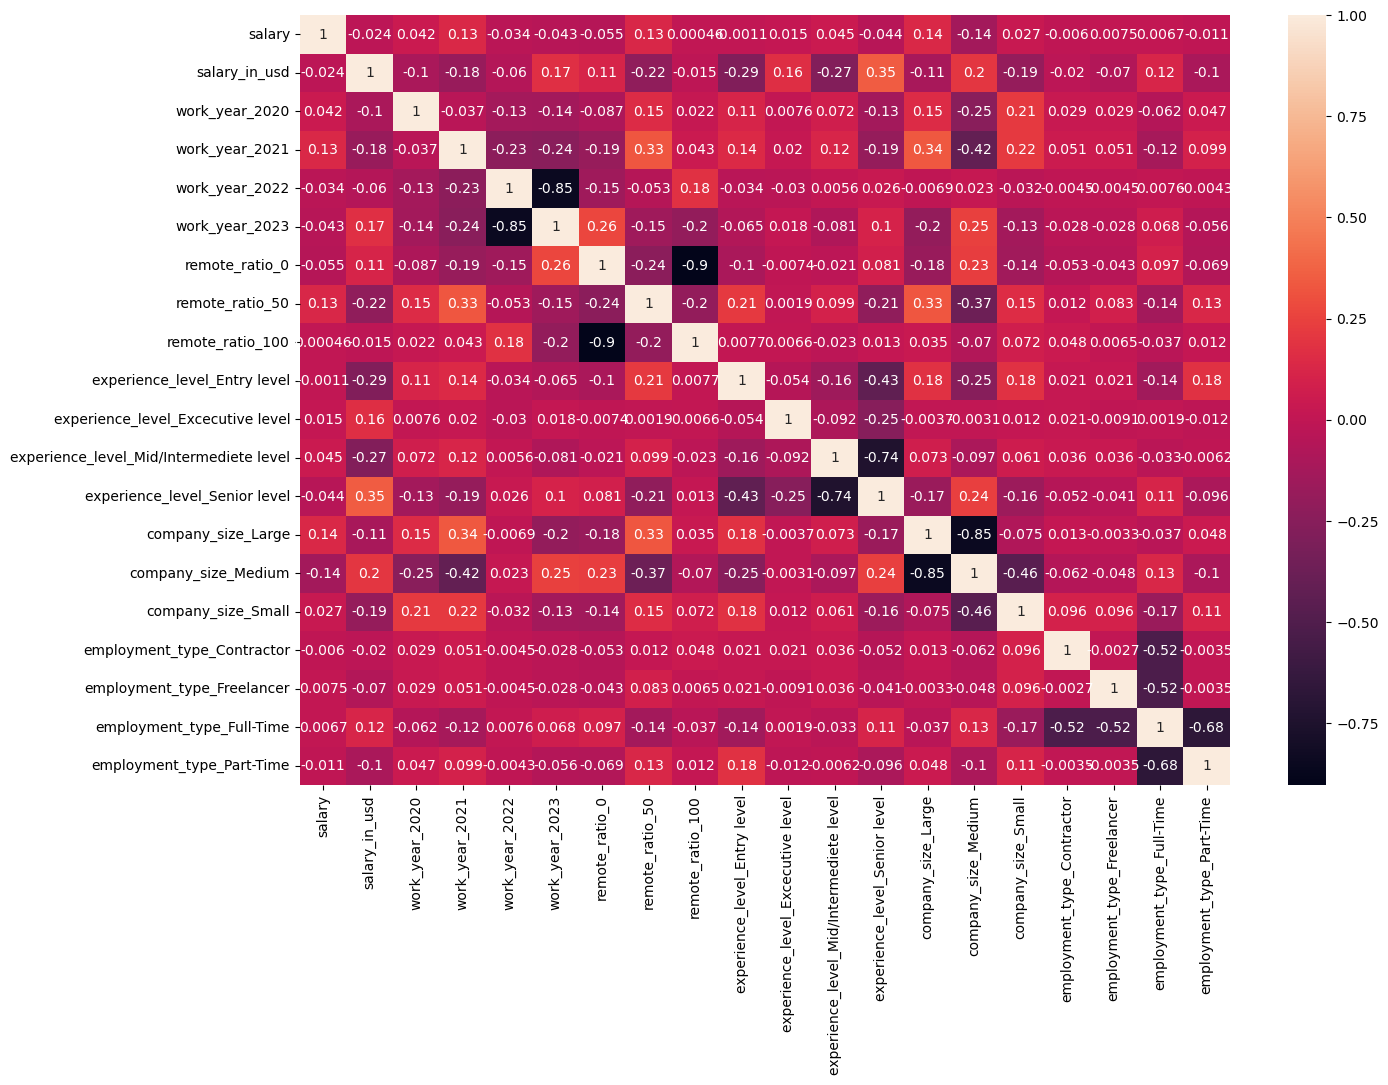

In [34]:
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr,annot=True)